## **Simple Linear Regression Implementation using Gradient Descent**


#### **Import Necessary Libraries**


In [726]:
import numpy as np
import matplotlib.pyplot as plt

In [727]:
plt.style.use("seaborn-v0_8-darkgrid")

#### **Generate linear data with noise**


Define Variables 𝑋 and 𝑦


In [728]:
n_samples = 20
slope = 5
intercept = 2
noise_level = 3
np.random.seed(42)

# Generate random x values
X = np.linspace(0, 10, n_samples)

# Generate the true y values and add noise
y_true = slope * X + intercept
y = y_true + np.random.normal(0, noise_level, n_samples)

#### **Plot the Original Data**


Visualize the data using a scatter plot of (X,y)


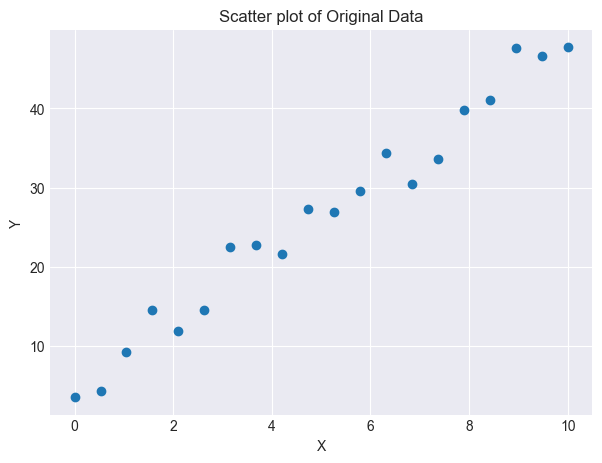

In [729]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of Original Data")
plt.show()

---


### **Linear Regression Full Implementation**


#### **Step 1: Initialize Parameters**


Initialize parameters (theta_0 & theta_1) with random value or simply zero.<br>
Also choose the Learning rate.


In [730]:
theta_0 = 0
theta_1 = 0
lr = 0.01
m = len(y)

#### **Step 2: Implement the Hypothesis Function**


Use (theta_0 & theta_1) to predict the output

> **Note: you will need to iterate through all data points**


$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [731]:
h_x = theta_0 + theta_1 * X
print("h(x):", h_x)

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### **Step 3: Calculate the Cost Function $J(\theta)$ (MSE)**


> <b>Note:</b> You better use either dot product or norm square of the error vector.


<p style="text-align: center; font-weight: bold;">Error Calculation</p>

$$\text{Error} = h_x - y$$


In [732]:
error = h_x - y
print("Error Vector:\n", error)

Error Vector:
 [ -3.49014246  -4.21678604  -9.20622351 -14.46382641 -11.82385567
 -14.45548387 -22.52711213 -22.72335682 -21.64420842 -27.31189066
 -26.9255364  -29.55017916 -34.30483418 -30.47068558 -33.66735177
 -39.78682162 -41.0667698  -47.6795841  -46.64434883 -47.7630889 ]


<p style="text-align: center;"><b>Cost Function J(θ) (MSE)</b></p>

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$$


In [733]:
J_theta = np.sum(error**2) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 443.69276433420544


<p style="text-align: center;"><b>Cost Function J(θ) (MSE)</b></p>

$$J(\theta) = \frac{\| \text{Error} \|_2^2}{2m}$$

- $\| \text{Error} \|_2$ denotes the L2 norm of the error vector, which is equivalent to the square root of the sum of the squares of its elements.


In [734]:
J_theta = np.linalg.norm(error) ** 2 / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 443.6927643342054


<p style="text-align: center;"><b>Cost Function J(θ) (MSE)</b></p>

$$J(\theta) = \frac{\text{E} \cdot \text{E}}{2m}$$


In [735]:
J_theta = (error @ error) / (2 * m)
print("\nJ(θ):", J_theta)


J(θ): 443.69276433420544


#### **Step 4: Compute the Gradient**


$$\frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_1^{(i)}$$


In [736]:
d_theta_0 = (error.sum()) / m
d_theta_1 = (error @ X) / m

print("d(θ₀):", d_theta_0)
print("d(θ₁):", d_theta_1)

d(θ₀): -26.48610431567451
d(θ₁): -173.25600339528313


#### **Step 5: Update Parameters (Simultaneously)**


**Gradient Descent Function Update Rules**

$$\theta_0 := \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\boldsymbol{\theta})$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\boldsymbol{\theta})$$


In [737]:
theta_0 = theta_0 - (lr * d_theta_0)
theta_1 = theta_1 - (lr * d_theta_1)

print("Updated θ₀:", theta_0)
print("Updated θ₁:", theta_1)

Updated θ₀: 0.2648610431567451
Updated θ₁: 1.7325600339528313


#### **Step 6: Iterate Until Convergence**


Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.

The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.


In [738]:
def gradient_descent(
    X, y, lr=0.1, max_iter=10000, loss_threshold=0.0001, gradient_threshold=0.001 , details = False
):
    """Return -> theta_0_opt, theta_1_opt, loss"""

    theta_0, theta_1 = 0, 0  # Initialize parameters
    m = len(y)
    loss = []

    for i in range(max_iter):
        if details:
            print(f"{"*"*25} Iteration {i+1} {"*"*25}\n")

        # Compute predictions
        h_x = theta_0 + theta_1 * X
        if details:
            print("h(x):", h_x,"\n")

        # Calculate error
        error = h_x - y
        if details:
            print("Error Vector:\n", error,"\n")

        # Compute cost (Mean Squared Error)
        J_theta = (np.linalg.norm(error) ** 2) / (2 * m)
        loss.append(J_theta)
        if details:
            print("J(θ):", J_theta,"\n")

        # Check for convergence based on loss difference
        if i > 0 and np.abs(loss[i - 1] - loss[i]) < loss_threshold:
            print(f"Loss change convergence achieved at iteration {i + 1}")
            break

        # Compute gradients
        d_theta_0 = error.sum() / m
        d_theta_1 = np.dot(error, X) / m
        if details:
            print("▽(θ₀):", d_theta_0 )
            print("▽(θ₁):", d_theta_1,"\n")


        # Compute gradient norm
        gradient_vector = np.array([d_theta_0, d_theta_1])
        gradient_norm = np.linalg.norm(gradient_vector)
        if details:
            print("Gradient Vector:\n",gradient_vector,"\n")
            print("Gradient Vector Norm:",gradient_norm,"\n")


        # Check for convergence based on gradient norm
        if gradient_norm < gradient_threshold:
            print(f"Gradient norm convergence achieved at iteration {i + 1}")
            break

        # Update parameters
        theta_0 -= lr * d_theta_0
        theta_1 -= lr * d_theta_1
        if details:
            print("Updated_θ₀: ", theta_0)
            print("Updated_θ₁: ", theta_1,"\n\n")

    return theta_0, theta_1, loss

In [739]:
lr = 0.01
max_iter = 1000

theta_0_opt, theta_1_opt, loss = gradient_descent(
    X,
    y,
    lr=lr,
    max_iter=max_iter,
    loss_threshold=0.01,
    gradient_threshold=0.01,
    details=False,
)

print("Optimum θ₀:", theta_0_opt)
print("Optimum θ₁:", theta_1_opt)

Loss change convergence achieved at iteration 16
Optimum θ₀: 0.8690917054623055
Optimum θ₁: 4.933289048869327


---


#### **Predict y values using the LR equation**

$$h_\theta(x) = \theta_0 + \theta_1 x$$


In [740]:
y_pred = theta_0_opt + theta_1_opt * X
print("h(x) = y_predict:\n", y_pred)
print("\ny_actual:\n", y)

h(x) = y_predict:
 [ 0.86909171  3.46555963  6.06202755  8.65849547 11.25496339 13.85143131
 16.44789923 19.04436715 21.64083507 24.23730299 26.83377091 29.43023883
 32.02670675 34.62317467 37.21964259 39.81611051 42.41257843 45.00904635
 47.60551427 50.20198219]

y_actual:
 [ 3.49014246  4.21678604  9.20622351 14.46382641 11.82385567 14.45548387
 22.52711213 22.72335682 21.64420842 27.31189066 26.9255364  29.55017916
 34.30483418 30.47068558 33.66735177 39.78682162 41.0667698  47.6795841
 46.64434883 47.7630889 ]


#### **Visualize Results**


Plot LR equation output (fitted line) with the original data (scatter plot of X,y)


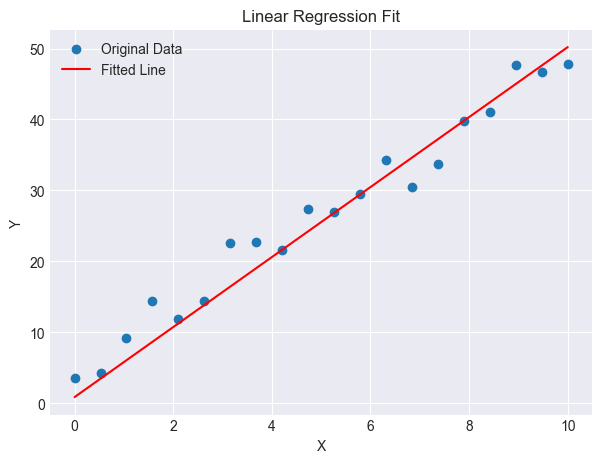

In [741]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Original Data")
plt.plot(X, y_pred, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [742]:
# Calculate R² score
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)
    return r2

In [743]:
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9562747097664349


#### **Plot Loss Function**


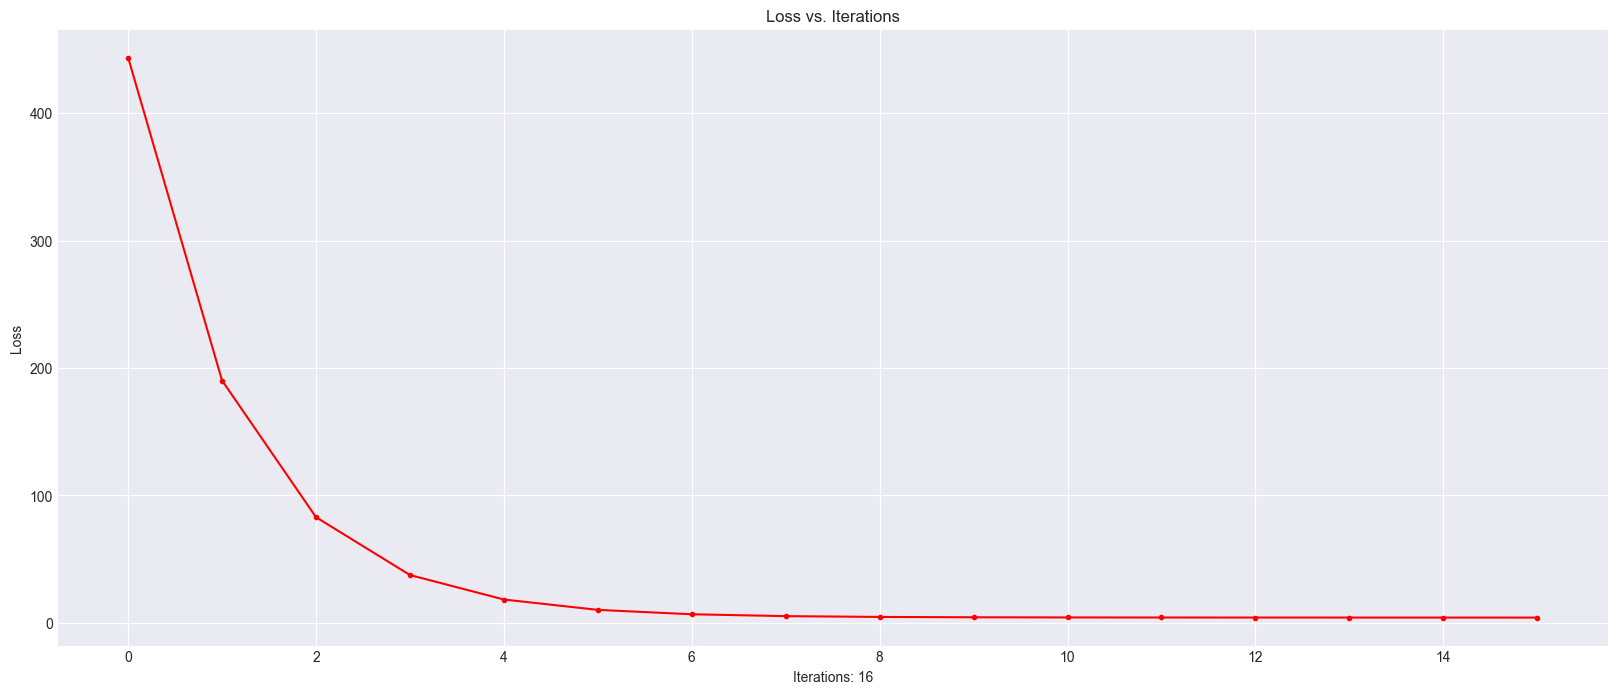

In [744]:
plt.figure(figsize=(20, 8))
plt.plot(loss, ".-r")
plt.title("Loss vs. Iterations")
plt.xlabel(f"Iterations: {len(loss)}")
plt.ylabel("Loss")
plt.show()